## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### January 2022
#### Datasets:  Toy example, Diabetes, Landsat and, Shuttle
#### Libraries: Scikit Learn, H20

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [2]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [4]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=99,
              solver='lbfgs')

In [5]:
#Showing  the weights
mlp.coefs_

[array([[-1.92864728e+01, -2.19842012e-02,  4.66125907e+01,
         -1.21214465e+01, -1.66607565e+01],
        [ 9.29670838e+01, -3.73197174e-01,  4.15534374e+01,
         -1.23326054e+01, -3.20080488e+00]]),
 array([[-7.18327688e-04],
        [ 9.44034376e-01],
        [ 1.11408734e-02],
        [ 1.96769231e+00],
        [-1.39385187e+00]])]

In [6]:
#Showing the biases
mlp.intercepts_

[array([-7.47103877,  0.45692388,  1.40033409, -0.1631209 ,  0.57263237]),
 array([-51.63127073])]

The neural net has 21 parameters to be estimated

In [7]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.85846927e-10, 9.99999999e-01],
       [1.03517195e-12, 1.00000000e+00],
       [3.92923316e-09, 9.99999996e-01],
       [2.20558634e-08, 9.99999978e-01],
       [1.10431594e-07, 9.99999890e-01],
       [5.66857183e-09, 9.99999994e-01],
       [8.18679409e-04, 9.99181321e-01],
       [1.65271638e-03, 9.98347284e-01],
       [2.31305419e-10, 1.00000000e+00],
       [1.06298526e-10, 1.00000000e+00],
       [3.11181433e-01, 6.88818567e-01],
       [8.12597403e-06, 9.99991874e-01],
       [3.51924666e-06, 9.99996481e-01],
       [2.62822209e-02, 9.73717779e-01],
       [1.15113613e-04, 9.99884886e-01],
       [1.78346920e-01, 8.21653080e-01],
       [2.22614061e-02, 9.77738594e-01],
       [1.61208501e-04, 9.99838791e-01],
       [5.07604815e-07, 9.99999492e-01],
       [9.933556

In [8]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [9]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [10]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



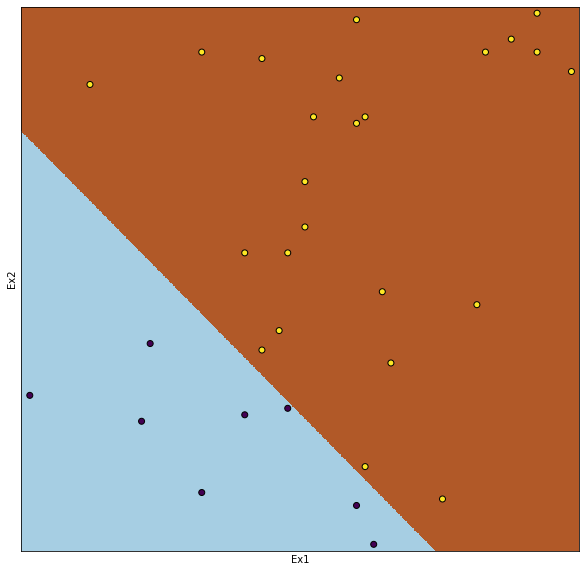

In [11]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [12]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.9


In [13]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=2000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=2000, random_state=99,
              solver='lbfgs')

In [14]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [15]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [16]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

In [17]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.7083333333333333


### Example 2. Nnets applied to Diabetes

In [18]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


#### Splitting the data in training(70%) and test (30%) datasets

In [19]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [20]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=20, max_iter=500)

In [21]:
#mlp.coefs_

In [22]:
mlp.intercepts_

[array([ 0.42784629, -0.51338681,  0.84817029, -0.06408562, -0.32965863,
        -0.7255845 ,  0.03383078,  0.39372865,  0.78633029,  0.61155798,
         0.14383866, -0.0295312 , -0.18461508,  0.17169439,  0.25260583,
         0.30922502,  0.43978787, -0.24017728,  0.31491391,  0.3429489 ]),
 array([-0.65851231])]

The model has 201 parameters

In [23]:
pred=mlp.predict(X_test)

In [24]:
#Estimacion del error usando Training y test datasets
mlp.score(X_test, y_test)

0.671875

In [25]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       135
           2       0.43      0.35      0.39        57

    accuracy                           0.67       192
   macro avg       0.59      0.58      0.58       192
weighted avg       0.65      0.67      0.66       192



In [26]:
#Estimating the accuracy using cross validation( 20 neurons)
from sklearn.model_selection import cross_val_score
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X1, y1) 
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6979152426520848


#### The overfitting problem in Neural Nets 

In [27]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=5000,random_state=90)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.6848958333333334

In [28]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=5000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.8216145833333334

In [29]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=5000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.8580729166666666

In [30]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(hidden_layer_sizes=(500),max_iter=5000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.7630208333333334

In [31]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.82421875

In [32]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [33]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.7994791666666666

In [34]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.8385416666666666

In [35]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8841145833333334

In [36]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.713773069036227


In [37]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.773427887901572


In [38]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.71607997265892


In [39]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6690874914559124


### Example 3. Nnet  applied to Landsat 

In [40]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
#url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)

In [41]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X1, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)

In [42]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[263   0   3   0   1   0]
 [  0 120   0   2   5   0]
 [  2   0 233  11   0   4]
 [  3   3  15  59   1  14]
 [  3   3   0   2  95   9]
 [  0   0   7  13   9 229]]


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       267
           2       0.95      0.94      0.95       127
           3       0.90      0.93      0.92       250
           4       0.68      0.62      0.65        95
           5       0.86      0.85      0.85       112
           6       0.89      0.89      0.89       258

    accuracy                           0.90      1109
   macro avg       0.88      0.87      0.87      1109
weighted avg       0.90      0.90      0.90      1109



### IV.  Deep Learning  with MLP applied to Diabetes

In [44]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import  H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\eacun\anaconda38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eacun\AppData\Local\Temp\tmpa2ni6tg3
  JVM stdout: C:\Users\eacun\AppData\Local\Temp\tmpa2ni6tg3\h2o_eacun_started_from_python.out
  JVM stderr: C:\Users\eacun\AppData\Local\Temp\tmpa2ni6tg3\h2o_eacun_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Halifax
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,3 months and 24 days !!!
H2O_cluster_name:,H2O_from_python_eacun_lytrk5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.2 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████

In [ ]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

In [ ]:
dl_model.model_performance(diabetes)

In [ ]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

In [ ]:
dl_model1.confusion_matrix

### V . Deep Learning with MLP applied to Shuttle

In [ ]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

In [ ]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

In [ ]:
dl_model.model_performance(shuttle)

In [ ]:
dl_model.confusion_matrix